In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

## 1. Data Preparation

In [2]:
df=pd.read_excel('Data\Online Retail.xlsx')

I load the data. Once done, I also give some basic informations on the content of the dataframe: the type of the various variables, the number of null values and their percentage with respect to the total number of entries:

In [3]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Quantity,541909.0,9.552250,218.081158,-80995.00,1.00,3.00,10.00,80995.0
UnitPrice,541909.0,4.611114,96.759853,-11062.06,1.25,2.08,4.13,38970.0
CustomerID,406829.0,15287.690570,1713.600303,12346.00,13953.00,15152.00,16791.00,18287.0


In [5]:
df.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [6]:
### Checking for Missing values
pd.DataFrame(data={'Data Type':df.dtypes.values,'Null Values':df.isna().sum().values,
        '%age of Null Values':[round(df.isna().sum().values[i]*100/len(df),2) for i in range(len(df.columns))]},index=df.columns).T

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
Data Type,object,object,object,int64,datetime64[ns],float64,float64,object
Null Values,0,0,1454,0,0,0,135080,0
%age of Null Values,0.0,0.0,0.27,0.0,0.0,0.0,24.93,0.0


While looking at the number of null values in the dataframe, it is interesting to note that  ∼ 25% of the entries are not assigned to a particular customer. With the data available, it is impossible to impute values for the user and these entries are thus useless for the current exercise. So I delete them from the dataframe:

In [7]:
df[df.Description.isna()==True].sort_values(by='UnitPrice',ascending=False)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,2010-12-01 11:52:00,0.0,NaN,United Kingdom
268303,560403,21272,NaN,17,2011-07-18 14:19:00,0.0,NaN,United Kingdom
268301,560401,84925F,NaN,15,2011-07-18 14:19:00,0.0,NaN,United Kingdom
268300,560400,21069,NaN,6,2011-07-18 14:19:00,0.0,NaN,United Kingdom
268299,560399,82583,NaN,17,2011-07-18 14:18:00,0.0,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
143309,548683,72801G,NaN,47,2011-04-01 16:45:00,0.0,NaN,United Kingdom
143308,548682,72789,NaN,-2,2011-04-01 16:44:00,0.0,NaN,United Kingdom
143307,548681,72800D,NaN,3,2011-04-01 16:43:00,0.0,NaN,United Kingdom
143306,548680,72800D,NaN,-18,2011-04-01 16:43:00,0.0,NaN,United Kingdom


`We can see that the data point with the values missing are just some faulty entries with zero Unit Price. So we can delete them`

In [8]:
df.dropna(subset=['CustomerID'],axis=0,inplace=True)
pd.DataFrame(data={'Data Type':df.dtypes.values,'Null Values':df.isna().sum().values,
        '%age of Null Values':[round(df.isna().sum().values[i]*100/len(df),2) for i in range(len(df.columns))]},index=df.columns).T

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
Data Type,object,object,object,int64,datetime64[ns],float64,float64,object
Null Values,0,0,0,0,0,0,0,0
%age of Null Values,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
### Checking for Duplicates
print('The number of Duplicates are ',df.duplicated().sum())
df[df.duplicated()==True]

The number of Duplicates are  5225


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
517,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,2010-12-01 11:45:00,1.25,17908.0,United Kingdom
527,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,2010-12-01 11:45:00,2.10,17908.0,United Kingdom
537,536409,22900,SET 2 TEA TOWELS I LOVE LONDON,1,2010-12-01 11:45:00,2.95,17908.0,United Kingdom
539,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,2010-12-01 11:45:00,4.95,17908.0,United Kingdom
555,536412,22327,ROUND SNACK BOXES SET OF 4 SKULLS,1,2010-12-01 11:49:00,2.95,17920.0,United Kingdom
...,...,...,...,...,...,...,...,...
541675,581538,22068,BLACK PIRATE TREASURE CHEST,1,2011-12-09 11:34:00,0.39,14446.0,United Kingdom
541689,581538,23318,BOX OF 6 MINI VINTAGE CRACKERS,1,2011-12-09 11:34:00,2.49,14446.0,United Kingdom
541692,581538,22992,REVOLVER WOODEN RULER,1,2011-12-09 11:34:00,1.95,14446.0,United Kingdom
541699,581538,22694,WICKER STAR,1,2011-12-09 11:34:00,2.10,14446.0,United Kingdom


In [10]:
df.drop_duplicates(inplace=True)

In [11]:
df.duplicated().sum()

0

## 2. Exploring the Data

### `Country`

In [12]:
df.Country.unique()

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Austria',
       'Israel', 'Finland', 'Greece', 'Singapore', 'Lebanon',
       'United Arab Emirates', 'Saudi Arabia', 'Czech Republic', 'Canada',
       'Unspecified', 'Brazil', 'USA', 'European Community', 'Bahrain',
       'Malta', 'RSA'], dtype=object)

In [13]:
df.Country.value_counts()

United Kingdom          356728
Germany                   9480
France                    8475
EIRE                      7475
Spain                     2528
Netherlands               2371
Belgium                   2069
Switzerland               1877
Portugal                  1471
Australia                 1258
Norway                    1086
Italy                      803
Channel Islands            757
Finland                    695
Cyprus                     611
Sweden                     461
Austria                    401
Denmark                    389
Japan                      358
Poland                     341
USA                        291
Israel                     247
Unspecified                241
Singapore                  229
Iceland                    182
Canada                     151
Greece                     146
Malta                      127
United Arab Emirates        68
European Community          61
RSA                         58
Lebanon                     45
Lithuani

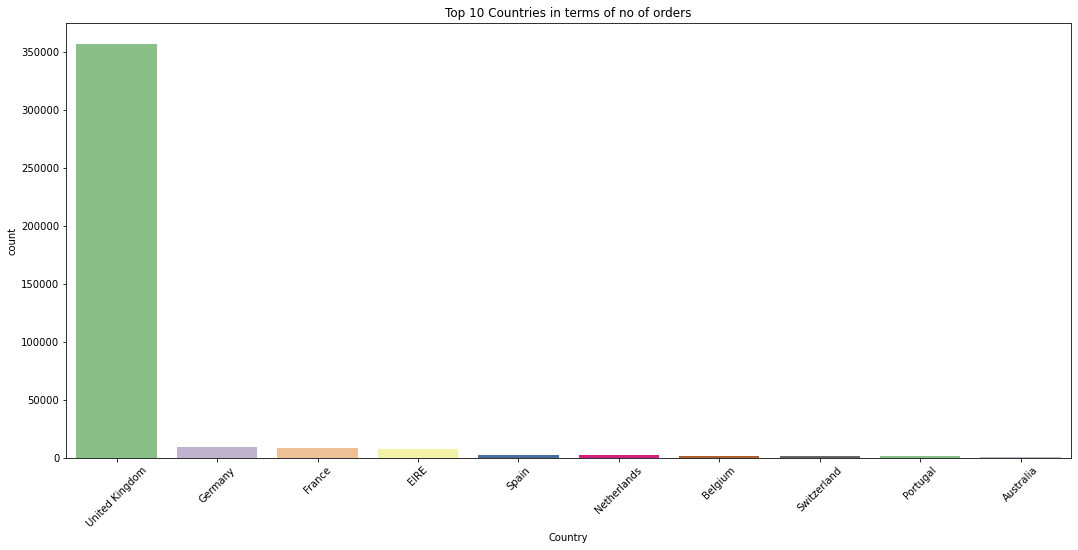

In [14]:
plt.figure(figsize=(18,8))
sns.countplot(df.Country,order=df.Country.value_counts(ascending=False).index[:10],palette='Accent')
plt.xticks(rotation=45)
plt.title('Top 10 Countries in terms of no of orders')
plt.show()

The above graph shows the percentage of orders from the top 10 countries, sorted by the number of orders. This shows that more than 90% of orders are coming from United Kingdom and no other country even makes up 3% of the orders in the data.

Therefore, for the purpose of this analysis, I will be taking data corresponding to orders from the United Kingdom. This subset will be made in one of the next steps and will be mentioned as required.

### `Customers and Products`

In [15]:
#Let us now look at the total number of products, transactions, and customers in the data, 
#which correspond to the total unique stock codes, invoice number, and customer IDs present in the data.

pd.DataFrame([{'Products': len(df['StockCode'].value_counts()),    
               'Transactions': len(df['InvoiceNo'].value_counts()),
               'Customers': 4372,  
              }], index = ['Quantity'])

,Products,Transactions,Customers
Quantity,3684,22190,4372


It can be seen that the data concern 4372 users and that they bought 3958 different products. The total number of transactions carried out is of the order of  ∼ 22'000.

will determine the number of products purchased in every transaction:

In [16]:
temp=df.groupby('InvoiceNo',as_index=False).agg(
    {'Description':np.count_nonzero}).sort_values(by='Description',ascending=False)
temp.columns=['InvoiceNo','Total_Orders']
temp

,InvoiceNo,Total_Orders
16242,576339,542
17524,579196,533
18165,580727,529
17128,578270,442
15081,573576,435
...,...,...
19716,C550029,1
16273,576385,1
19719,C550147,1
19720,C550165,1


The first lines of this list shows several things worthy of interest:

1. the existence of entries with the prefix C for the InvoiceNo variable: this indicates transactions that have been canceled
2. the existence of users who only came once and only purchased one product (e.g. nº12346)
3. the existence of frequent users that buy a large number of items at each order

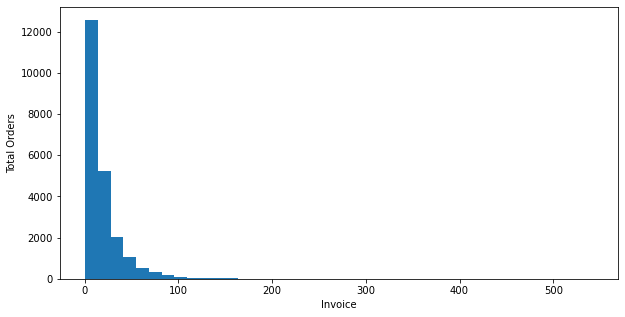

In [17]:
## Order Distribution per Invoice
plt.figure(figsize=(10,5))
plt.hist(temp.Total_Orders,bins=40)
plt.xlabel('Invoice')
plt.ylabel('Total Orders')
plt.show()

In [18]:
temp['check']=[str(np.where(str.startswith(str(k),'C')==False,'Not Cancelled','Cancelled')) for k in temp.InvoiceNo]

In [19]:
print(temp.check.value_counts())

Not Cancelled    18536
Cancelled         3654
Name: check, dtype: int64


[]

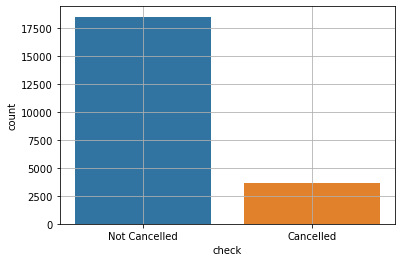

In [20]:
sns.countplot(temp.check)
plt.grid()
plt.plot()

In [22]:
print('\nAround {}% of orders were cancelled'.format(round(temp.check.value_counts()[1]*100/len(temp),2)))


Around 16.47% of orders were cancelled


We note that the number of cancellations is quite large ( ∼ 16% of the total number of transactions).

In [23]:
df.head()[:2]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


### `Stock Code`

In [24]:
temp=pd.DataFrame(data={'StockCode':df.StockCode,'Description':df.Description,'dtype':[str.isidentifier(str(k)) for k in df.StockCode]})
temp[temp.dtype==True][:5]

,StockCode,Description,dtype
45,POST,POSTAGE,True
141,D,Discount,True
386,POST,POSTAGE,True
1123,POST,POSTAGE,True
1423,C2,CARRIAGE,True


In [25]:
temp[temp.dtype==True].StockCode.unique()

array(['POST', 'D', 'C2', 'M', 'PADS', 'DOT', 'CRUK'], dtype=object)

In [27]:
codes=['POST', 'D', 'C2', 'M', 'PADS', 'DOT', 'CRUK']
temp=temp[temp.StockCode.isin(codes)]
for code in codes:
    print("{:<15} -> {:<30}".format(code,temp[df.StockCode==code].Description.unique()[0]))

POST            -> POSTAGE                       
D               -> Discount                      
C2              -> CARRIAGE                      
M               -> Manual                        
PADS            -> PADS TO MATCH ALL CUSHIONS    
DOT             -> DOTCOM POSTAGE                
CRUK            -> CRUK Commission               


We see that there are several types of peculiar transactions, connected i.e., port charges, bank fee, discount, free gifts,etc

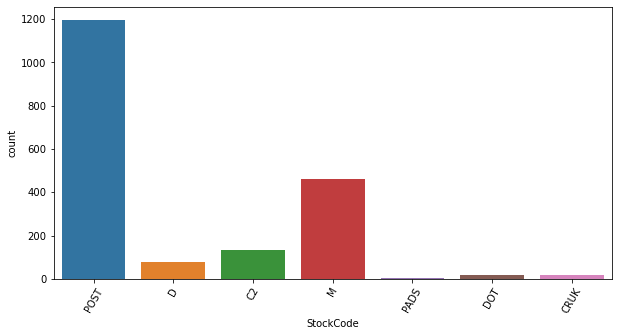

In [28]:
plt.figure(figsize=(10,5))
sns.countplot(temp.StockCode)
plt.xticks(rotation=60)
plt.show()

## `Total Amount per Billing`

In order to have a global view of the type of order performed in this dataset, I determine how the purchases are divided according to total Amount

In [29]:
df['Amount']=df.UnitPrice*df.Quantity
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [30]:
temp=df[(df.Quantity>0) & (df.StockCode.isin(codes).values==False)].groupby(
    'InvoiceNo',as_index=False).agg(
    {'Quantity':sum,'Amount':sum})
temp.head()

,InvoiceNo,Quantity,Amount
0,536365,40,139.12
1,536366,12,22.20
2,536367,83,278.73
3,536368,15,70.05
4,536369,3,17.85


<AxesSubplot:xlabel='Amount'>

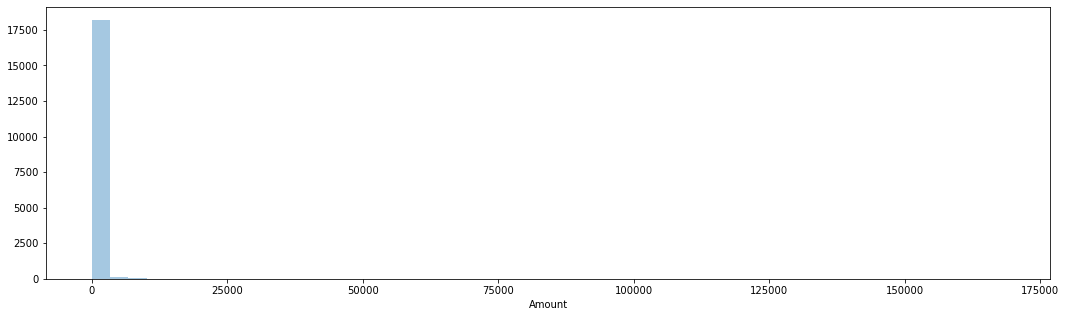

In [31]:
plt.figure(figsize=[18,5])
sns.distplot(temp[temp!=0].Amount,kde=False,)

Maximum orders are under $12500

In [32]:
bins = [-1,50,100,200,500,1000,5000,np.inf]
names = ['<50','50-100','100-200','200-500','500-1000','1000-5000','5000+']
temp['amount_cat']=pd.cut(temp['Amount'],bins,labels=names)

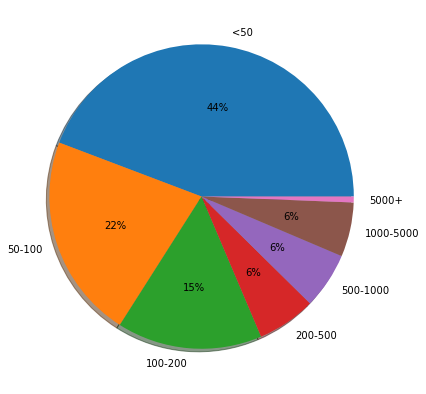

In [33]:
plt.figure(figsize=(7,7))
plt.pie(temp[temp.Amount>0].amount_cat.value_counts().values,labels=names,autopct = lambda x:'{:1.0f}%'.format(x) if x > 1 else '',
       shadow = True, startangle=0)
plt.show()

It can be seen that the vast majority of orders concern purcheses of low value ∼ 78% of purchases give prices in excess of £200.

In [34]:
temp=df[(df.Quantity>0) & (df.StockCode.isin(codes).values==False)].groupby(
    'Country',as_index=False).agg(
    {'Quantity':sum,'Amount':sum})
temp.head()

,Country,Quantity,Amount
0,Australia,84198,138103.81
1,Austria,4844,8742.68
2,Bahrain,260,548.40
3,Belgium,22962,36927.34
4,Brazil,356,1143.60


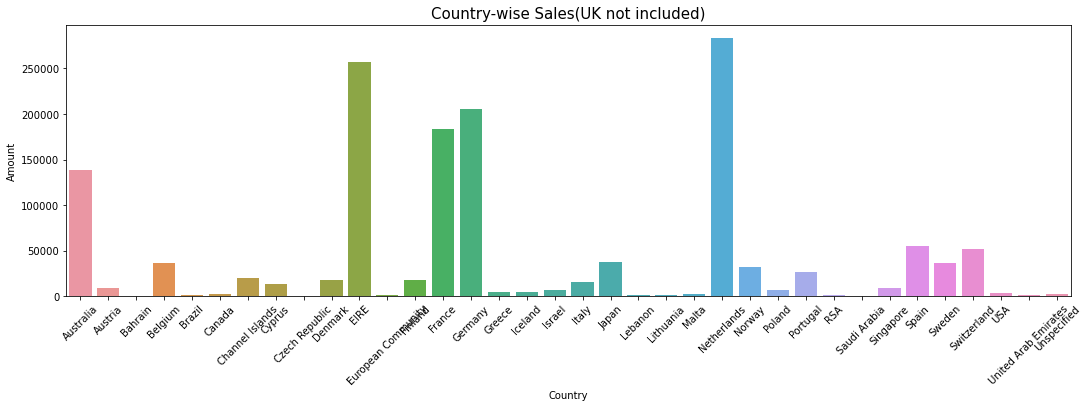

In [35]:
plt.figure(figsize=(18,5))
sns.barplot(x='Country',y='Amount',data=temp[temp.Country!='United Kingdom'],)
plt.xticks(rotation=45)
plt.title('Country-wise Sales(UK not included)',size=15)
plt.show()

### I thought of implementing nltk to `create product categories` but it can happen that a particular category of product wasn't sold for the whole year. So generalising things to segregate all products in this clusters won't prove to be a good method

## 3. Understanding Cohort Analysis

What is Cohort Analysis?

A cohort is a set of users who share similar characteristics over time. Cohort analysis groups the users into mutually exclusive groups and their behaviour is measured over time.

It can provide information about product and customer lifecycle.

There are three types of cohort analysis:

1. Time cohorts: It groups customers by their purchase behaviour over time.
2. Behaviour cohorts: It groups customers by the product or service they signed up for.
3. Size cohorts: Refers to various sizes of customers who purchase company's products or services. This categorization can be based on the amount of spending in some period of time.

Understanding the needs of various cohorts can help a company design custom-made services or products for particular segments.

In the following analysis, we will create Time cohorts and look at customers who remain active during particular cohorts over a period of time that they transact over.

### `Time Cohorts`

`Checking the date range of our data, we find that it ranges from the start date: 2010–12–01 to the end date: 2011–12–09.`

`Next, a column called CohortMonth was created to indicate the month of the transaction by taking the first date of the month of InvoiceDate for each transaction. Then, information about the first month of the transaction was extracted, grouped by the CustomerID.`

In [36]:
import datetime as dt

In [37]:
# Start and end dates:
print('Start date: {}'.format(df.InvoiceDate.min()))
print('End date: {}'.format(df.InvoiceDate.max()))

Start date: 2010-12-01 08:26:00
End date: 2011-12-09 12:50:00


In [38]:
cohort_data = df[['InvoiceNo','StockCode','Description','Quantity','InvoiceDate','UnitPrice','Amount','CustomerID','Country']]

In [39]:
cohort_data.isna().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
Amount         0
CustomerID     0
Country        0
dtype: int64

In [40]:
cohort_data.InvoiceDate=pd.to_datetime(cohort_data.InvoiceDate).apply(lambda x:dt.datetime(x.year,x.month,x.day))

In [41]:
cohort_data.head()[:2]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Amount,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01,2.55,15.30,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01,3.39,20.34,17850.0,United Kingdom


In [42]:
grouping=cohort_data.groupby('CustomerID',as_index=False)['InvoiceDate'].min()
grouping.columns=['CustomerID','CohortMonth']
grouping['CohortMonth']=grouping['CohortMonth'].apply(lambda x:dt.datetime(x.year,x.month,1))
grouping.columns=['CustomerID','CohortMonth']
cohort_data=cohort_data.merge(grouping,on='CustomerID',how='left')
cohort_data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Amount,CustomerID,Country,CohortMonth
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01,2.55,15.30,17850.0,United Kingdom,2010-12-01
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01,3.39,20.34,17850.0,United Kingdom,2010-12-01
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01,2.75,22.00,17850.0,United Kingdom,2010-12-01
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01,3.39,20.34,17850.0,United Kingdom,2010-12-01
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01,3.39,20.34,17850.0,United Kingdom,2010-12-01


In [43]:
cohort_data['CohortIndex']=pd.Series((cohort_data.InvoiceDate-cohort_data.CohortMonth)/30).dt.days.astype('int')

In [44]:
cohort_data.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Amount,CustomerID,Country,CohortMonth,CohortIndex
401599,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09,0.85,10.20,12680.0,France,2011-08-01,4
401600,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09,2.10,12.60,12680.0,France,2011-08-01,4
401601,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09,4.15,16.60,12680.0,France,2011-08-01,4
401602,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09,4.15,16.60,12680.0,France,2011-08-01,4
401603,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09,4.95,14.85,12680.0,France,2011-08-01,4


In [45]:
grouping=cohort_data.groupby(['CohortMonth','CohortIndex'],as_index=False).agg({'CustomerID':'nunique'})
cohort_counts=grouping.pivot_table(columns='CohortIndex',index='CohortMonth')
cohort_counts

CustomerID                                                   \
CohortIndex         0      1      2      3      4      5      6      7    
CohortMonth                                                               
2010-12-01       948.0  341.0  339.0  355.0  353.0  367.0  349.0  340.0   
2011-01-01       403.0  122.0  117.0  102.0  136.0  122.0  111.0  104.0   
2011-02-01       380.0   95.0   72.0  103.0  102.0   92.0   95.0  100.0   
2011-03-01       422.0  100.0  108.0   93.0   99.0   78.0  106.0  108.0   
2011-04-01       299.0   67.0   67.0   65.0   60.0   63.0   70.0   77.0   
2011-05-01       270.0   73.0   50.0   46.0   51.0   78.0   69.0   43.0   
2011-06-01       235.0   46.0   44.0   59.0   58.0   77.0   35.0    NaN   
2011-07-01       187.0   43.0   38.0   46.0   49.0   29.0    NaN    NaN   
2011-08-01       162.0   48.0   37.0   45.0   25.0    NaN    NaN    NaN   
2011-09-01       298.0   87.0   93.0   42.0    NaN    NaN    NaN    NaN   
2011-10-01       343.0   97.0   53.0    NaN    NaN    NaN    NaN    NaN   
2011-11-01       321.0   43.0    NaN    NaN    NaN    NaN    NaN    NaN   
2011-12-01        41.0    NaN    NaN    NaN    NaN    NaN    NaN    NaN   

                                                
CohortIndex     8      9      10     11     12  
CohortMonth                                     
2010-12-01   330.0  354.0  355.0  467.0  334.0  
2011-01-01   122.0  144.0  154.0   89.0    NaN  
2011-02-01   103.0  113.0   51.0    NaN    NaN  
2011-03-01   125.0   56.0    NaN    NaN    NaN  
2011-04-01    35.0    NaN    NaN    NaN    NaN  
2011-05-01     NaN    NaN    NaN    NaN    NaN  
2011-06-01     NaN    NaN    NaN    NaN    NaN  
2011-07-01     NaN    NaN    NaN    NaN    NaN  
2011-08-01     NaN    NaN    NaN    NaN    NaN  
2011-09-01     NaN    NaN    NaN    NaN    NaN  
2011-10-01     NaN    NaN    NaN    NaN    NaN  
2011-11-01     NaN    NaN    NaN    NaN    NaN  
2011-12-01     NaN    NaN    NaN    NaN    NaN

What does the above table tell us?

Consider CohortMonth 2010–12–01: For CohortIndex 0, this tells us that 815 unique customers made transactions during CohortMonth 2010–12–01. For CohortIndex 1, this tells that there are 289 customers out of 815 who made their first transaction during CohortMonth 2010–12–01 and they also made transactions during the next month. That is, they remained active.

For CohortIndex 2, this tells that there are 263 customers out of 815 who made their first transaction during CohortMonth 2010–12–01 and they also made transactions during the second-next month. And so on for higher CohortIndices.

Let us now calculate the Retention Rate. It is defined as the percentage of active customers out of total customers. Since the number of active customers in each cohort corresponds to the CohortIndex 0 values, we take the first column of the data as the cohort sizes.

In [46]:
cohort_sizes = cohort_counts.iloc[:,0]

# Divide all values in the cohort_counts table by cohort_sizes
retention=cohort_counts.divide(cohort_sizes, axis=0)

# Review the retention table
retention=retention.round(3)*100
retention

CustomerID                                                        \
CohortIndex         0     1     2     3     4     5     6     7     8     9    
CohortMonth                                                                    
2010-12-01       100.0  36.0  35.8  37.4  37.2  38.7  36.8  35.9  34.8  37.3   
2011-01-01       100.0  30.3  29.0  25.3  33.7  30.3  27.5  25.8  30.3  35.7   
2011-02-01       100.0  25.0  18.9  27.1  26.8  24.2  25.0  26.3  27.1  29.7   
2011-03-01       100.0  23.7  25.6  22.0  23.5  18.5  25.1  25.6  29.6  13.3   
2011-04-01       100.0  22.4  22.4  21.7  20.1  21.1  23.4  25.8  11.7   NaN   
2011-05-01       100.0  27.0  18.5  17.0  18.9  28.9  25.6  15.9   NaN   NaN   
2011-06-01       100.0  19.6  18.7  25.1  24.7  32.8  14.9   NaN   NaN   NaN   
2011-07-01       100.0  23.0  20.3  24.6  26.2  15.5   NaN   NaN   NaN   NaN   
2011-08-01       100.0  29.6  22.8  27.8  15.4   NaN   NaN   NaN   NaN   NaN   
2011-09-01       100.0  29.2  31.2  14.1   NaN   NaN   NaN   NaN   NaN   NaN   
2011-10-01       100.0  28.3  15.5   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
2011-11-01       100.0  13.4   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
2011-12-01       100.0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   

                               
CohortIndex    10    11    12  
CohortMonth                    
2010-12-01   37.4  49.3  35.2  
2011-01-01   38.2  22.1   NaN  
2011-02-01   13.4   NaN   NaN  
2011-03-01    NaN   NaN   NaN  
2011-04-01    NaN   NaN   NaN  
2011-05-01    NaN   NaN   NaN  
2011-06-01    NaN   NaN   NaN  
2011-07-01    NaN   NaN   NaN  
2011-08-01    NaN   NaN   NaN  
2011-09-01    NaN   NaN   NaN  
2011-10-01    NaN   NaN   NaN  
2011-11-01    NaN   NaN   NaN  
2011-12-01    NaN   NaN   NaN

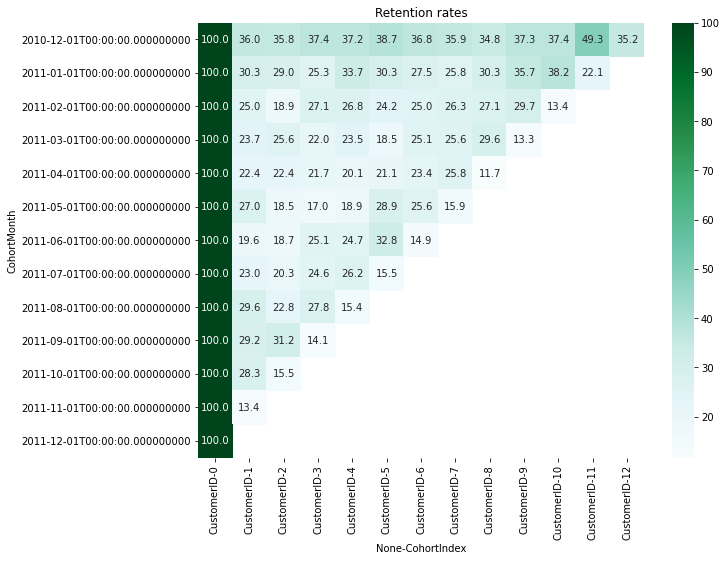

In [47]:
plt.figure(figsize=(10, 8))
sns.heatmap(retention,annot=True,fmt = '0.1f',cmap ='BuGn')
plt.title('Retention rates')
plt.show()

# 4. RFM Segmentation

RFM stands for Recency, Frequency, and Monetary.

`RFM analysis is a commonly used technique to generate and assign a score to each customer based on how recent their last transaction was (Recency), how many transactions they have made in the last year (Frequency), and what the monetary value of their transaction was (Monetary).`

`RFM analysis helps to answer the following questions: Who was our most recent customer? How many times has he purchased items from our shop? And what is the total value of his trade? All this information can be critical to understanding how good or bad a customer is to the company.`

`After getting the RFM values, a common practice is to create ‘quartiles’ on each of the metrics and assigning the required order.` 

We will be using Amount column to get the monetary value of each transaction. Calling the .describe() method on this column, we get:

In [48]:
cohort_data.head()[:3]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Amount,CustomerID,Country,CohortMonth,CohortIndex
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01,2.55,15.30,17850.0,United Kingdom,2010-12-01,0
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01,3.39,20.34,17850.0,United Kingdom,2010-12-01,0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01,2.75,22.00,17850.0,United Kingdom,2010-12-01,0


The defination of recency takes into consideration a complete one year data. So, we'll crop out one year from the end of data

In [49]:
print("The Date Range we'll select will be\n")
start_date=cohort_data.InvoiceDate.max()-dt.timedelta(days=364)
print('Start Date: ',start_date)
print('End Date: ',cohort_data.InvoiceDate.max())

The Date Range we'll select will be

Start Date:  2010-12-10 00:00:00
End Date:  2011-12-09 00:00:00


In [50]:
data_rfm=cohort_data[(cohort_data.InvoiceDate>=start_date) & (cohort_data.Amount>0)]
data_rfm.reset_index(drop=True,inplace=True)
data_rfm.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Amount,CustomerID,Country,CohortMonth,CohortIndex
0,538172,21562,HAWAIIAN GRASS SKIRT,12,2010-12-10,1.25,15.0,15805.0,United Kingdom,2010-12-01,0
1,538172,79321,CHILLI LIGHTS,8,2010-12-10,4.95,39.6,15805.0,United Kingdom,2010-12-01,0
2,538172,22041,"RECORD FRAME 7"" SINGLE SIZE",12,2010-12-10,2.55,30.6,15805.0,United Kingdom,2010-12-01,0
3,538172,84558A,3D DOG PICTURE PLAYING CARDS,12,2010-12-10,2.95,35.4,15805.0,United Kingdom,2010-12-01,0
4,538172,22952,60 CAKE CASES VINTAGE CHRISTMAS,24,2010-12-10,0.55,13.2,15805.0,United Kingdom,2010-12-01,0


`Now, for RFM analysis, we need to define a ‘snapshot date’, which is the day on which we are conducting this analysis. Here, I have taken the snapshot date as the highest date in the data + 1 (The next day after the date till which the data was updated). This is equal to the date 2011–12–10. (YYYY-MM-DD)`

In [51]:
snapshot_date=data_rfm.InvoiceDate.max()+dt.timedelta(days=1) #The date at which the RFM Analysis should be taking place
print('Snapshot Date: ',snapshot_date)

Snapshot Date:  2011-12-10 00:00:00


In [52]:
# Aggregate data on a customer level

data=data_rfm.groupby('CustomerID',as_index=False).agg({'InvoiceDate':lambda x:(snapshot_date-x.max()).days,
                                        'InvoiceNo':'count',
                                        'Amount':'sum'}).rename(columns = {'InvoiceDate': 'Recency',
                                                                                   'InvoiceNo': 'Frequency',
                                                                                   'Amount': 'MonetaryValue'})
data.head()

,CustomerID,Recency,Frequency,MonetaryValue
0,12346.0,326,1,77183.60
1,12347.0,3,151,3598.21
2,12348.0,76,31,1797.24
3,12349.0,19,73,1757.55
4,12350.0,311,17,334.40


`For the recency metric, the highest value, 4, will be assigned to the customers with the least recency value (since they are the most recent customers). `

`For the frequency and monetary metric, the highest value, 4, will be assigned to the customers with the Top 25% frequency and monetary values, respectively.` 

`After dividing the metrics into quartiles, we can collate the metrics into a single column (like a string of characters {like ‘213’}) to create classes of RFM values for our customers. We can divide the RFM metrics into lesser or more cuts depending on our requirements.`

In [53]:
r_quartiles=pd.qcut(data.Recency,4,labels=[4,3,2,1])
f_quartiles=pd.qcut(data.Frequency,4,labels=[1,2,3,4])
m_quartiles=pd.qcut(data.MonetaryValue,4,labels=[1,2,3,4])

data['R']=r_quartiles
data['F']=f_quartiles
data['M']=m_quartiles

In [54]:
data.head()

,CustomerID,Recency,Frequency,MonetaryValue,R,F,M
0,12346.0,326,1,77183.60,1,1,4
1,12347.0,3,151,3598.21,4,4,4
2,12348.0,76,31,1797.24,2,2,4
3,12349.0,19,73,1757.55,3,3,4
4,12350.0,311,17,334.40,1,1,2


In [55]:
data['RFM_Segment']=[str(data.R[i])+str(data.F[i])+str(data.M[i]) for i in range(len(data))]
data['RFM_Score']=data.R.astype('int')+data.F.astype('int')+data.M.astype('int')

In [56]:
data.head()

,CustomerID,Recency,Frequency,MonetaryValue,R,F,M,RFM_Segment,RFM_Score
0,12346.0,326,1,77183.60,1,1,4,114,6
1,12347.0,3,151,3598.21,4,4,4,444,12
2,12348.0,76,31,1797.24,2,2,4,224,8
3,12349.0,19,73,1757.55,3,3,4,334,10
4,12350.0,311,17,334.40,1,1,2,112,4


Let us now analyse RFM Score distribution and their groups.

In [57]:
data.groupby('RFM_Score').agg({'Recency': 'mean',
                                'Frequency': 'mean',
                                'MonetaryValue': ['mean', 'count'] }).round(1)


Recency Frequency MonetaryValue      
             mean      mean          mean count
RFM_Score                                      
3           246.0       8.2         156.2   373
4           167.1      14.0         237.3   387
5           145.4      20.6         363.6   495
6            88.3      26.8         810.0   456
7            83.5      39.3         756.6   453
8            59.2      54.0         977.9   462
9            44.0      76.9        1808.6   395
10           32.1     109.2        2032.5   431
11           21.1     184.5        4010.5   375
12            7.6     362.1        9126.3   437

As expected, customers with the lowest RFM scores have the highest recency value and the lowest frequency and monetary value, and the vice-versa is true as well.

#### `Finally, we can create segments within this score range of RFM_Score 3–12, by manually creating categories in our data:`
1. Customers with an RFM_Score greater than or equal to 9 can be put in the ‘Top’ category. 
2. Similarly, customers with an RFM_Score between 5 to 9 can be put in the ‘Middle’ category, and 
3. the rest can be put in the ‘Low’ category. 

Let us call our categories the ‘General_Segment’. Analyzing the mean values of recency, frequency, and monetary, we get:

In [58]:
bins=[0,5,9,np.inf]
label=['Low','Middle','Top']
data['General_Segment']=pd.cut(data.RFM_Score,bins=bins,labels=label)

In [59]:
data.groupby('General_Segment').agg({'Recency':'mean',
                                    'Frequency':'mean',
                                    'MonetaryValue':['mean','count']}).round(1)

Recency Frequency MonetaryValue      
                   mean      mean          mean count
General_Segment                                      
Low               182.0      14.8         263.0  1255
Middle             69.5      48.4        1063.6  1766
Top                20.2     220.8        5123.2  1243

### In many scenarios, this would be okay. But, if we want to properly find out segments on our RFM values, we can use a clustering algorithm like K-means.

## Preprocessing data for Clustering

`In the next section, we are going to prepare the data for Kmeans clustering on RFM Score data. To do this, we need to preprocess the data so that it can meet the key assumptions of Kmeans algorithm, which are:`

`1. The varaiables should be distributed symmetrically
2. Variables should have similar average values
3. Variables should have similar standard deviation values`

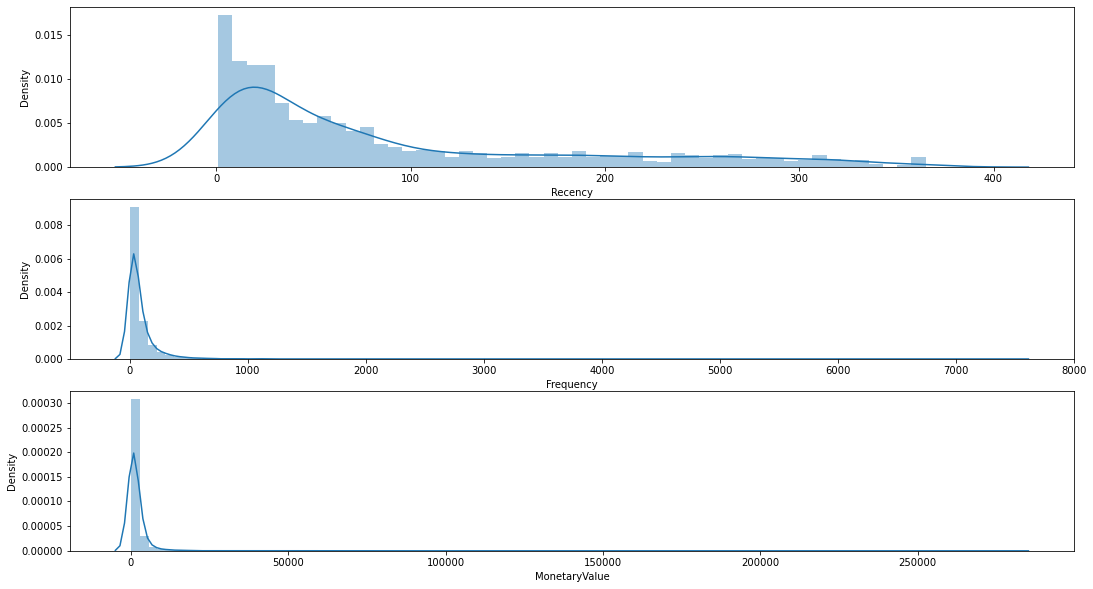

In [60]:
# Checking the distribution of Recency, Frequency and MonetaryValue variables.
plt.figure(figsize=(18,10))

# Plot distribution of var1
plt.subplot(3, 1, 1); sns.distplot(data['Recency'],bins=50)

# Plot distribution of var2
plt.subplot(3, 1, 2); sns.distplot(data['Frequency'],bins=100)

# Plot distribution of var3
plt.subplot(3, 1, 3); sns.distplot(data['MonetaryValue'],bins=100)

plt.show()

As we can see from the above plots, all the variables do not have a symmetrical distribution. All of them are skewed to the right. To remove the skewness, we can try the following transformations:

1. log transformations
2. Box-Cox transformations
3. Cube root transformations

The log transformation cannot be used for negative values. One common practice one can use here is to add a constant value to get a positive value and this is generally taken as the absolute of the least negative value of the variable to each observation. However, in our data, we do not have any negative values since we are dealing with customer transactions dataset.

In [61]:
data[['Recency', 'Frequency', 'MonetaryValue']].describe().T

,count,mean,std,min,25%,50%,75%,max
Recency,4264.0,88.241792,93.888162,1.00,18.000,50.00,134.0000,365.00
Frequency,4264.0,88.768293,220.815601,1.00,17.000,40.00,97.0000,7491.00
MonetaryValue,4264.0,2011.386614,8780.849894,3.75,303.045,660.66,1636.3625,280206.02


Min Value of every column > 0

Also, We also see that we do not get constant mean and standard deviation values.

In [62]:
data.sample(5)

,CustomerID,Recency,Frequency,MonetaryValue,R,F,M,RFM_Segment,RFM_Score,General_Segment
3649,17420.0,51,23,467.98,2,2,2,222,6,Middle
3880,17733.0,39,35,692.19,3,2,3,323,8,Middle
3394,17053.0,131,13,498.48,2,1,2,212,5,Low
4090,18044.0,5,127,2088.60,4,4,4,444,12,Top
2802,16218.0,30,56,2613.38,3,3,4,334,10,Top


In [63]:
rfm_data = data[['Recency','Frequency','MonetaryValue']]

In [64]:
from sklearn.preprocessing import StandardScaler

In [65]:
# Unskew the data
data_log = np.log(rfm_data)

# Initialize a standard scaler and fit it
scaler = StandardScaler()
scaler.fit(data_log)

# Scale and center the data
data_normalized = scaler.transform(data_log)

# Create a pandas DataFrame
data_norm = pd.DataFrame(data=data_normalized, index=rfm_data.index, columns=rfm_data.columns)

In [66]:
data_norm.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
Recency,4264.0,0.0,1.0,-2.75,-0.64,0.11,0.83,1.56
Frequency,4264.0,0.0,1.0,-2.79,-0.63,0.02,0.70,4.01
MonetaryValue,4264.0,-0.0,1.0,-4.18,-0.68,-0.06,0.66,4.75


Will check for skewness in Data now again

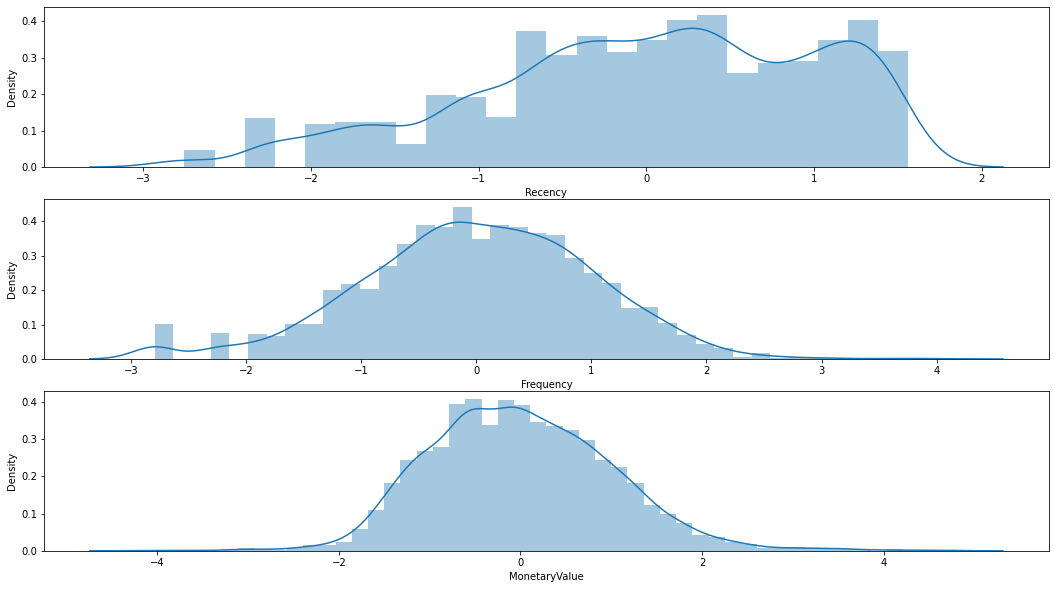

In [67]:
plt.figure(figsize=(18,10))

# Plot recency distribution
plt.subplot(3, 1, 1); sns.distplot(data_norm['Recency'])

# Plot frequency distribution
plt.subplot(3, 1, 2); sns.distplot(data_norm['Frequency'])

# Plot monetary value distribution
plt.subplot(3, 1, 3); sns.distplot(data_norm['MonetaryValue'])

# Show the plot
plt.show()

### `Skewness has been removed`

## Clustering with K-means Algorithm

We will build multiple clusters upon our RFM data and will try to find out the optimal number of clusters in our data using the `elbow method`.

In [68]:
from sklearn.cluster import KMeans

In [69]:
sse=[]

#Fit KMeans and calculate sse for every k
for i in range(1,25,1):
    model=KMeans(n_clusters=i,random_state=40)
    model.fit(data_norm)
    sse.append(model.inertia_)

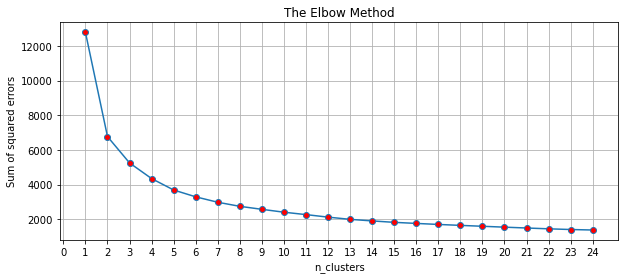

In [70]:
plt.figure(figsize=(10,4))

plt.title('The Elbow Method')
plt.xlabel('n_clusters'); 
plt.ylabel('Sum of squared errors')
plt.plot(range(1,25,1),sse,marker='o',markerfacecolor='r')
plt.xticks(ticks=range(0,25,1))
plt.grid()
plt.show()

From the above plot, we can see that the optimal number of cluster is 3 or 4 or 5.

Let us take k = 3 first.

In [71]:
kmeans = KMeans(n_clusters=3, random_state=1)
kmeans.fit(data_norm)
cluster_labels = kmeans.labels_

In [72]:
data_norm_k3 = data_norm.assign(Cluster = cluster_labels) #Normalized RFM DATA
data_k3 = rfm_data.assign(Cluster = cluster_labels)#Orignal RFM Data

# Calculate average RFM values and size for each cluster like we did before
summary_k3 = data_k3.groupby(['Cluster']).agg({'Recency': 'mean',
                                                    'Frequency': 'mean',
                                                    'MonetaryValue': ['mean', 'count'],}).round(0)

summary_k3

Recency Frequency MonetaryValue      
           mean      mean          mean count
Cluster                                      
0          14.0     245.0        6131.0  1001
1         162.0      15.0         287.0  1476
2          69.0      62.0        1128.0  1787

Let us now take k = 4.

In [73]:
kmeans = KMeans(n_clusters=4, random_state=1)
kmeans.fit(data_norm)
cluster_labels = kmeans.labels_

In [74]:
data_norm_k4 = data_norm.assign(Cluster = cluster_labels) #Normalized RFM DATA
data_k4 = rfm_data.assign(Cluster = cluster_labels)#Orignal RFM Data

# Calculate average RFM values and size for each cluster like we did before
summary_k4 = data_k4.groupby(['Cluster']).agg({'Recency': 'mean',
                                                    'Frequency': 'mean',
                                                    'MonetaryValue': ['mean', 'count'],}).round(0)

summary_k4

Recency Frequency MonetaryValue      
           mean      mean          mean count
Cluster                                      
0         176.0      15.0         290.0  1334
1          13.0     275.0        6984.0   834
2          20.0      38.0         588.0   861
3          92.0      78.0        1505.0  1235

K=5

In [75]:
kmeans = KMeans(n_clusters=5, random_state=1)
kmeans.fit(data_norm)
cluster_labels = kmeans.labels_

In [76]:
data_norm_k5= data_norm.assign(Cluster = cluster_labels) #Normalized RFM DATA
data_k5= rfm_data.assign(Cluster = cluster_labels)#Orignal RFM Data

# Calculate average RFM values and size for each cluster like we did before
summary_k5 = data_k5.groupby(['Cluster']).agg({'Recency': 'mean',
                                                    'Frequency': 'mean',
                                                    'MonetaryValue': ['mean', 'count'],}).round(0)

summary_k5

Recency Frequency MonetaryValue      
           mean      mean          mean count
Cluster                                      
0           9.0     309.0        8301.0   640
1          60.0     110.0        2070.0   980
2         162.0       7.0         194.0   692
3          18.0      40.0         624.0   782
4         158.0      31.0         524.0  1170

## Profiling and Interpreting segments

In [77]:
display(summary_k3)
display(summary_k4)
display(summary_k5)

Recency Frequency MonetaryValue      
           mean      mean          mean count
Cluster                                      
0          14.0     245.0        6131.0  1001
1         162.0      15.0         287.0  1476
2          69.0      62.0        1128.0  1787

Recency Frequency MonetaryValue      
           mean      mean          mean count
Cluster                                      
0         176.0      15.0         290.0  1334
1          13.0     275.0        6984.0   834
2          20.0      38.0         588.0   861
3          92.0      78.0        1505.0  1235

Recency Frequency MonetaryValue      
           mean      mean          mean count
Cluster                                      
0           9.0     309.0        8301.0   640
1          60.0     110.0        2070.0   980
2         162.0       7.0         194.0   692
3          18.0      40.0         624.0   782
4         158.0      31.0         524.0  1170

We can also build snakeplots to understand and compare the segments. Let us build a snakeplot for our data with all clusters value.

Before building snakeplots, let us assign back customerID values to the row indices.

In [78]:
data_norm_k3.index = data['CustomerID'].astype(int)
data_norm_k4.index = data['CustomerID'].astype(int)
data_norm_k5.index = data['CustomerID'].astype(int)

In [79]:
data_norm_k4.head()

,Recency,Frequency,MonetaryValue,Cluster
CustomerID,,,,
12346,1.479712,-2.792006,3.723607,3
12347,-1.950298,1.034484,1.284471,1
12348,0.414363,-0.173034,0.732172,3
12349,-0.599867,0.480165,0.714405,3
12350,1.445249,-0.631221,-0.605778,0


In [80]:
# Melt the data into along format so RFM values and metric names are stored in 1 column each like Feature and its value
data_melt_k3=pd.melt(data_norm_k3.reset_index(),id_vars=['CustomerID','Cluster'],
                  value_vars=['Recency','Frequency','MonetaryValue'],
                  var_name='Features',
                  value_name='Value')

data_melt_k4=pd.melt(data_norm_k4.reset_index(),id_vars=['CustomerID','Cluster'],
                  value_vars=['Recency','Frequency','MonetaryValue'],
                  var_name='Features',
                  value_name='Value')

data_melt_k5=pd.melt(data_norm_k5.reset_index(),id_vars=['CustomerID','Cluster'],
                  value_vars=['Recency','Frequency','MonetaryValue'],
                  var_name='Features',
                  value_name='Value')

data_melt_k4.head()

,CustomerID,Cluster,Features,Value
0,12346,3,Recency,1.479712
1,12347,1,Recency,-1.950298
2,12348,3,Recency,0.414363
3,12349,3,Recency,-0.599867
4,12350,0,Recency,1.445249


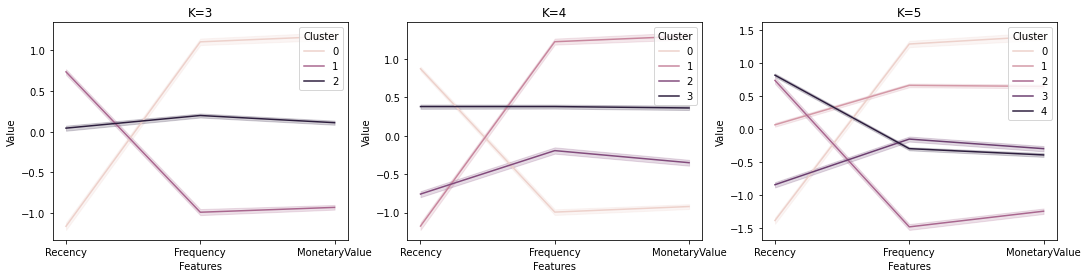

In [81]:
plt.figure(figsize=[18,4])
plt.title('Snake plot of standardized variables')
plt.subplot(1,3,1);sns.lineplot(x="Features", y="Value", hue='Cluster', data=data_melt_k3);plt.title('K=3')
plt.subplot(1,3,2);sns.lineplot(x="Features", y="Value", hue='Cluster', data=data_melt_k4);plt.title('K=4')
plt.subplot(1,3,3);sns.lineplot(x="Features", y="Value", hue='Cluster', data=data_melt_k5);plt.title('K=5')
plt.show()

From the above snake plot, we can see the distribution of recency, frequency, and monetary metric values across the clusters. The clusters seem to be separate from each other, which indicates a good heterogeneous mix of clusters. Best happens for k=3

#### `Assigning CustomerID index to data_k4 dataframe and rfm_data dataframe:`

In [82]:
data_k4.index = data['CustomerID'].astype(int)
data_k4.head()

rfm_data.index = data['CustomerID'].astype(int)
rfm_data.head()

,Recency,Frequency,MonetaryValue
CustomerID,,,
12346,326,1,77183.60
12347,3,151,3598.21
12348,76,31,1797.24
12349,19,73,1757.55
12350,311,17,334.40


In [83]:
cluster_avg = data_k4.groupby(['Cluster']).mean()
population_avg = rfm_data.head().mean()

In [84]:
display(cluster_avg)
display(population_avg)

,Recency,Frequency,MonetaryValue
Cluster,,,
0,175.922039,14.580210,290.137692
1,12.980815,275.472422,6983.839029
2,20.216028,38.458769,587.618699
3,91.782186,77.895547,1505.301533


Recency            147.0
Frequency           54.6
MonetaryValue    16934.2
dtype: float64

In [85]:
relative_imp = cluster_avg.divide(population_avg,axis=1)
relative_imp.round(2)

,Recency,Frequency,MonetaryValue
Cluster,,,
0,1.20,0.27,0.02
1,0.09,5.05,0.41
2,0.14,0.70,0.03
3,0.62,1.43,0.09


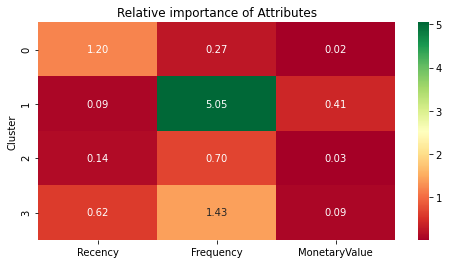

In [86]:
# Plot heatmap
plt.figure(figsize=(8, 4))
plt.title('Relative importance of Attributes')
sns.heatmap(data=relative_imp, annot=True, fmt='.2f', cmap='RdYlGn')
plt.show()

# Final Thoughts

From the above analysis, we can see that there should be 4 clusters in our data. To understand what these 4 clusters mean in a business scenario, we should look back the table comparing the clustering performance of 3 and 4 clusters for the mean values of recency, frequency, and monetary metric. On this basis, let us label the clusters as ‘New customers’, ‘Lost customers’, ‘Best customers’, and ‘At risk customers’.

Below is the table giving the RFM interpretation of each segment and the points that a company is recommended to keep in mind while designing the marketing strategy for that segment of customers.


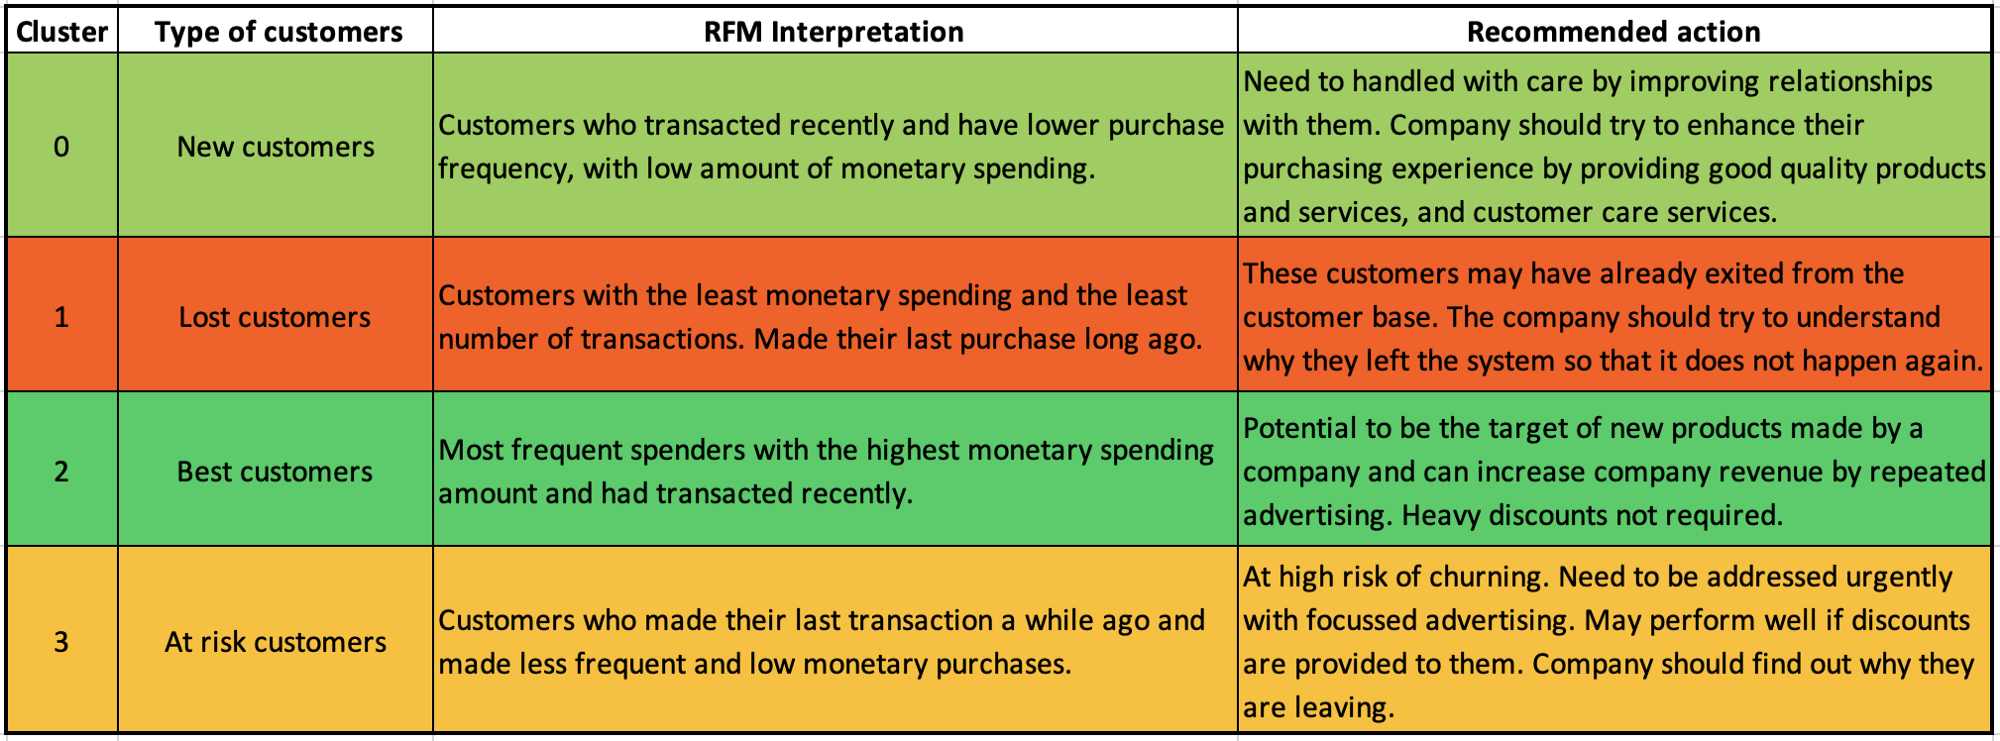